# **Homework 3**

In [462]:
#importing modules
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from itertools import cycle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **Question 1**

1. Please derive the gradient of the loss function in logistic regression (i.e., the logistic loss
as shown in below) with respect to w, which is a vector and the model parameter.

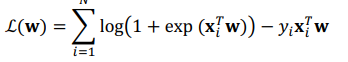

where (x, y) represents data of the i-th example, x being the data vector 
for input 
variables and y being the scalar for the label; N is the total number of examples in the 
data.

**Solution**:

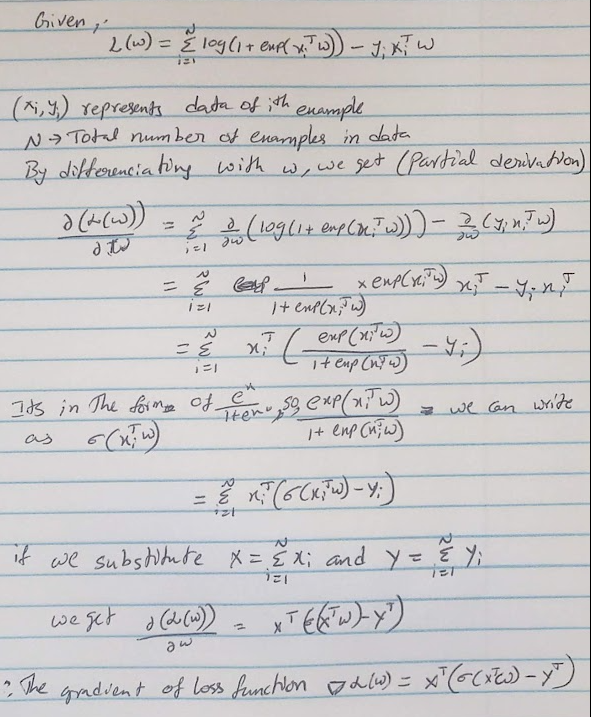

## **Question 2**

2. **Program** your own logistic regression classifier (Python is preferred) by implementing a 
gradient decent algorithm to find the optimal **w** that minimizes the logistic loss in 
Problem 1. That is to find solution to the following optimization problem:

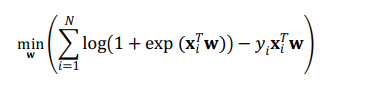



**Solution**:

Created a function Logistic, which takes input as X for training set, X for testing set, Y for Testing set, Y for Training set, learning rate and number of iterations. THe output is created as a dictionary item called value which contains Y_prediction_test, Y_probability_test, Y_prediction_train, Y_probability_train, Train_accuracy, test_accuracy, True positive, False Positive, True negative and False negative

In [463]:
#logistic loss function
def LogisticLossFunction(X_training,Y_training,W): 
  K = np.exp(np.dot(X_training,W))/(1+np.exp(np.dot(X_training,W)))
  cost = (-Y_training * np.log(K) - (1 - Y_training) * np.log(1 - K)).mean()
  dW = np.dot(X_training.T, (K-Y_training))/Y_training.size
  return dW, cost

In [464]:
#function for gradient Descent
def GradientDescent(X_training,Y_training,W,learning_rate, total_iterations):
  cost_list = []
  for i in range(0,total_iterations):
    dW, cost = LogisticLossFunction(X_training,Y_training,W)
    W = W - learning_rate * dW
    if  (i%1000 == 0):
      cost_list.append(cost)
      # print("Cost after iteration",i, ": ",cost)
  return W, dW, cost_list

In [465]:
#function for predicting class
def PredictedValue(X,w):
  y_prediction = []
  z = np.dot(X,w)
  y_probability = np.exp(np.dot(X,w))/(1+np.exp(np.dot(X,w)))
  for i in range(len(y_probability)):
    if(y_probability[i] >= 0.5):
      y_prediction.append(1)
    else:
      y_prediction.append(0)
  return y_prediction

In [466]:
#function to call logistic regression classifier
def logistic(X_train, Y_train, X_test, Y_test, learning_rate, total_iterations): 
  W = np.zeros((X_train.shape[1],1))
  
  W,dW,cost_list = GradientDescent(X_train, Y_train, W, learning_rate, total_iterations)
  
  #predicting the probabilities and get predicted_y for train.
  y_probability_train = np.exp(np.dot(X_train,W))/(1+np.exp(np.dot(X_train,W)))
  y_probability_test = np.exp(np.dot(X_test,W))/(1+np.exp(np.dot(X_test,W)))
  
  #predict the probabilities and get predicted_y for test.
  Y_Prediction_Train = PredictedValue(X_train,W)
  Y_Prediction_Test = PredictedValue(X_test,W)
  Y_train = np.squeeze(Y_train)
  Y_test = np.squeeze(Y_test)
  
  #calculate training accuracy
  train_accuracy= round((100 - np.mean(np.abs(Y_Prediction_Train - Y_train)) * 100),3)
  #calculate testing accuracy
  test_accuracy= round((100 - np.mean(np.abs(Y_Prediction_Test - Y_test)) * 100),3)
  
  #confusion Matrix
  TP, FP, TN, FN = 0,0,0,0
  true_positive = np.equal(Y_Prediction_Test, 1) & np.equal(Y_test, 1)
  true_negative = np.equal(Y_Prediction_Test, 0) & np.equal(Y_test, 0)
  false_positive = np.equal(Y_Prediction_Test, 1) & np.equal(Y_test, 0)
  false_negative = np.equal(Y_Prediction_Test, 0) & np.equal(Y_test, 1)
  TP = true_positive.sum()
  FP = false_positive.sum()
  TN = true_negative.sum()
  FN = false_negative.sum()


  values=[{ "Y_Prediction_Test" : Y_Prediction_Test,"Y_Prediction_Train" : Y_Prediction_Train,
            "Y_probability_train":y_probability_train,"Y_probability_test":y_probability_test,
             "train_accuracy" : train_accuracy,"test_accuracy" : test_accuracy,"True_Positive" : TP,
            "False_Positive" : FP,"True_Negative" : TN,"False_Negative" : FN
  }]
  return values

## **Question 3**

3. **Program** (with python preferred) a function that plots a ROC curve with inputs of a 
vector containing the true label and another vector containing the predicted probabilities 
of class membership for a set of examples. (Your implementation of the function is 
expected to include the computation of all pairs of TPR and FPR. No existing library is 
allowed for this.)

**Solution**:

Created function plot_ROC_curve to plot ROC curve using data from above function created in question 2. Taking inputs as Actual classification and predicted classification. We are getting True positive rate and False positive rate as outputs. we use the output to plot graph where True positive rate is on y-axis and False positive rate on X-axis

In [467]:
def roc_plot(Y_actual,Y_probability):
  
  true_positive = np.equal(Y_probability, 1) & np.equal(Y_actual, 1)
  true_negative = np.equal(Y_probability, 0) & np.equal(Y_actual, 0)
  false_positive = np.equal(Y_probability, 1) & np.equal(Y_actual, 0)
  false_negative = np.equal(Y_probability, 0) & np.equal(Y_actual, 1)
  
  TPR_list,FPR_list=[],[]
  TPR = true_positive.sum() / (true_positive.sum() + false_negative.sum())
  FPR = false_positive.sum() / (false_positive.sum() + true_negative.sum())
  FPR_list,TPR_list,_ = roc_curve(np.squeeze(Y_actual), np.squeeze(Y_probability))
  return FPR_list,TPR_list

In [468]:
def plot_ROC_curve(Y_actual,Y_probability):
  fig, ax = plt.subplots(1,1, figsize=(10,8))
  # generate thresholds over score domain 
  FPR, TPR = roc_plot(np.squeeze(Y_actual), np.squeeze(Y_probability))
  ax.set_xlim(-0.1,1.1)
  ax.set_ylim(-0.1,1.1)
  ax.plot(FPR, TPR)
  ax.set_title('ROC Curve for Logistic Regression',fontsize=16)
  ax.set_ylabel('True Positive Rate', fontsize=14)
  ax.set_xlabel('False Positive Rate', fontsize=14)
  fig.show()


## **Question 4**

4. **Apply** your logistic regression classifier to the breast cancer Wisconsin dataset, which 
can either be loaded with python by following instructions here:

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

or downloaded from 

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) .

Randomly splitting the data into two subsets with one having 2/3 of the examples and the other 
having the rest 1/3. Use the 2/3 subset to train a logistic regression model and the 1/3 subset to 
test the model. Plot the ROC curve on the testing set with your ROC plotting function.

**Solution**:

In [469]:
# Loading data to dataframes
data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns =data.feature_names)
df2 = pd.DataFrame(data=data.target,columns=['class'])

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [471]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [472]:
#Splitting dataset into two parts where training set is 2/3 of dataset and testing set is 1/3 of dataset
X_train, X_test, Y_train, Y_test = train_test_split(df,df2, test_size = 0.33, random_state = 1)

### **Using functions created in question 2 and 3**

In [473]:
model = logistic(X_train, Y_train, X_test, Y_test, 0.00001,  5000)

In [474]:
#training set accuracy
model[0]['train_accuracy']

91.864

In [475]:
#testing set accuracy
model[0]['test_accuracy']

92.553

In [476]:
#Confusion Matrix
print('\t\t\t Predicted\t\t')
print('\t\t   Positive   |\tNegative')
print('        ---------------------------------------')
print('           |positive   ',model[0]['True_Positive'],'  |\t',model[0]['False_Positive'])
print('Actual     |')
print('           |Negative   ',model[0]['False_Negative'],'    |\t',model[0]['True_Negative'])

			 Predicted		
		   Positive   |	Negative
        ---------------------------------------
           |positive    117   |	 8
Actual     |
           |Negative    6     |	 57


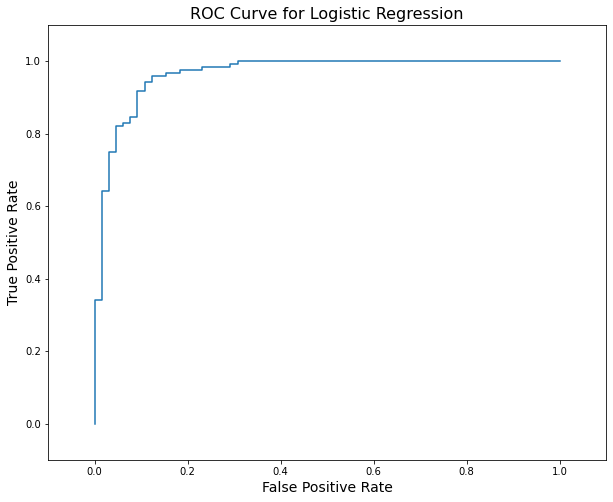

In [477]:
plot_ROC_curve(Y_test,model[0]['Y_probability_test'])

### **Using SkLearn Library**

In [478]:
#Fitting Logistic Regression model
premodel = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
premodel.fit(X_train, Y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [479]:
#Predictting class in test set
Y_predict = premodel.predict(X_test)

In [480]:
#accuracy of training model
premodel.score(X_train,Y_train)

0.937007874015748

In [481]:
# accuracy of testing model.
premodel.score(X_test,Y_test)

0.9361702127659575

In [482]:
#Confusion matrix for testing dataset
confusion_matrix(Y_test, Y_predict)

array([[ 60,   5],
       [  7, 116]])

In [483]:
#classification measures for each class.
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.96      0.94      0.95       123

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



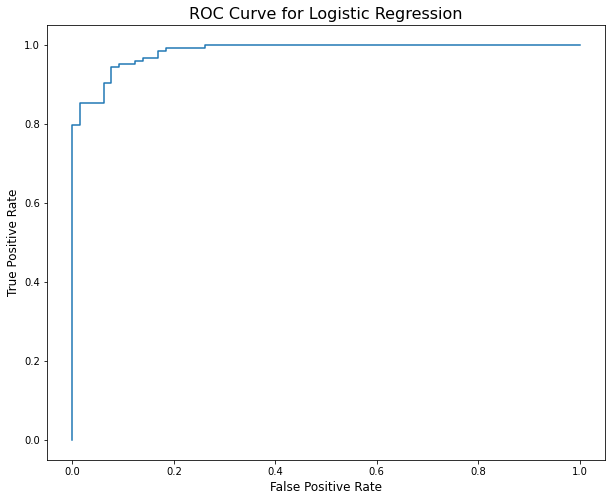

In [484]:
#create ROC curve
y_pred_proba = premodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr)
plt.title('ROC Curve for Logistic Regression',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.show()

### **Evaluations**

In a ROC curve the true positive rate is plotted in function of the false positive rate  for different cut-off points. Each point on the ROC curve represents a TPR/FPR pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner. Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the testing dataset

Here, the graph is going towards upper left corner towards 1 which makes the model more accurate. And the performance of the model is better.

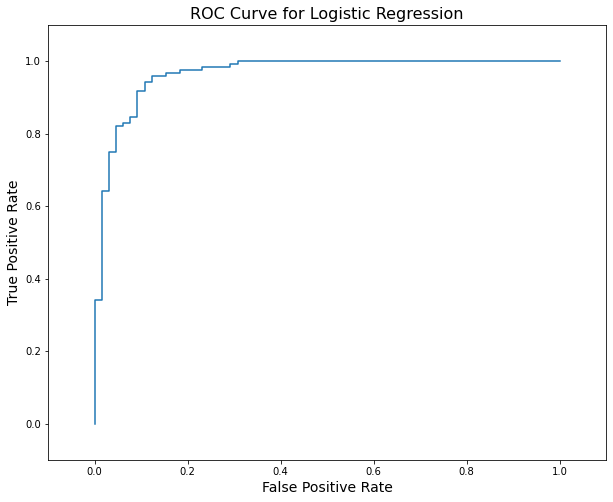

In [485]:
plot_ROC_curve(Y_test,model[0]['Y_probability_test'])

Sklearn model has more accuracy than our model but still our models also have better accuracies.

training accuracy = 91.864

testing accuracy = 92.553